In [1]:
library(NELSI)

Loading required package: ape


In [2]:
trees <- read.nexus('cc_sims.trees')
print(trees)
write.tree(trees[sample(1:length(trees), 100)], file = 'cc_sims_subsample.trees')

401 phylogenetic trees


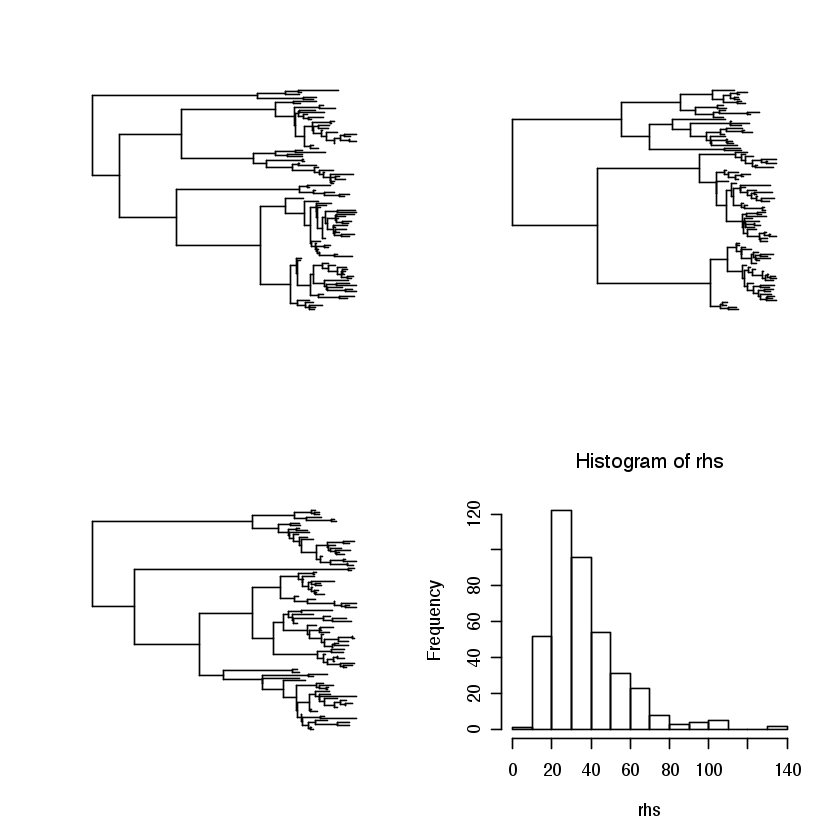

In [3]:
#root_heights <- sapply(trees, function(x) max(intnode.times(x)))
par(mfrow =c(2, 2))
plot(trees[[50]], show.tip.label = F)
plot(trees[[100]], show.tip.label = F)
plot(trees[[150]], show.tip.label = F)
rhs <- sapply(trees, function(x) max(allnode.times(x)))
hist(rhs)

In [4]:
sample_trees <- trees[sample(1:length(trees), 100)]
write.tree(sample_trees, file = 'cc_trees.trees')

In [5]:
#hist(sapply(bd, function(x) max(allnode.times(x))))
hist(sapply(bd, function(x) sum(x$edge.length)), add = F)

ERROR: Error in lapply(X = X, FUN = FUN, ...): object 'bd' not found


In [6]:
bd <- read.tree('../bd_sim_100.trees')

In [7]:
empirical_posterior <- read.table('cc_test1/cc_sim_rep_1.log', head = T)

In [8]:
summary_pps <- matrix(NA, 100, 2)
pps_logs <- dir('cc_test1/pps1/', pattern = 'log$')
for(i in 1:100){
    log_temp <- read.table(paste0('cc_test1/pps1/', pps_logs[i]), head =T)
    summary_pps[i, ] <- c(mean(log_temp$likelihood), median(log_temp$likelihood))
}

[1] 0.19

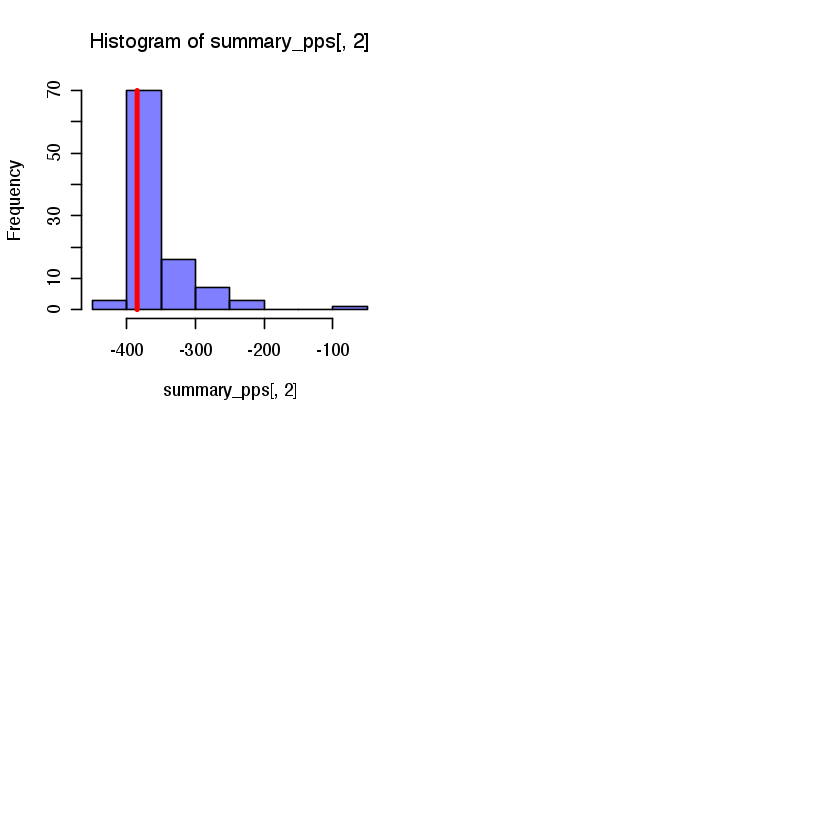

In [9]:
par(mfrow = c(2, 2))
hist(summary_pps[, 2], col = rgb(0, 0, 1, 0.5))
lines(c(mean(empirical_posterior$likelihood), 
        mean(empirical_posterior$likelihood)), y = c(0, 70), col = 'red', lwd = 3)
sum(median(empirical_posterior$likelihood) > summary_pps[, 2])/100

In [10]:
vero_trees <- read.nexus('coal_veronika_test_1.trees')

In [11]:
vero_subsampled <- vero_trees[sample(1:length(vero_trees), 100)]
write.tree(vero_subsampled, file = 'coal_veronika_subset.trees')

In [12]:
vero_empirical <- read.table('coal_veronika_test_1.log', head = T)

In [13]:
vero_pps <- matrix(NA, 100, 3)
vero_logfiles <- dir('veronika_test/', pattern = 'log')
for(i in 1:100){
    pps_temp <- read.table(paste0('veronika_test/', vero_logfiles[i]), head = T)
    vero_pps[i, ] <- c(mean(pps_temp$likelihood), median(pps_temp$likelihood), 
                       mean(pps_temp$popSize))
}

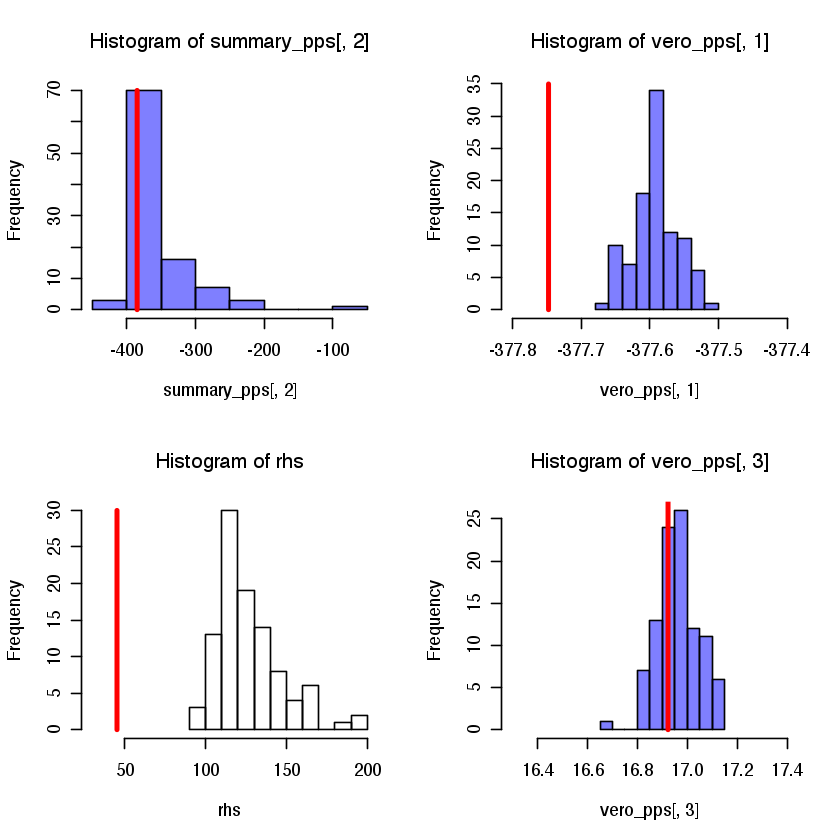

In [14]:
vero_tr <- read.tree('1_n100_lambda0.55_delta0.5_p1_N10000_Imodel_CE.newick')
vero_pps_trees <- read.tree('coal_veronika_test_1_pps.trees')

rhs <- sapply(vero_pps_trees, function(x) max(allnode.times(x)))

par(mfrow = c(2, 2))
hist(summary_pps[, 2], col = rgb(0, 0, 1, 0.5))
lines(c(mean(empirical_posterior$likelihood), 
        mean(empirical_posterior$likelihood)), y = c(0, 70), col = 'red', lwd = 3)

hist(vero_pps[, 1], xlim = c(-377.8, -377.4), col = rgb(0, 0, 1, 0.5))
lines(c(mean(vero_empirical$likelihood), 
        mean(vero_empirical$likelihood)), y = c(0, 35), col = 'red', lwd = 3)

rh <- max(allnode.times(vero_tr))
hist(rhs, xlim = c(30, 200))
lines(c(rh, rh), c(0, 30), lwd = 3, col = 'red')
    
hist(vero_pps[, 3], xlim = c(16.3, 17.4), col = rgb(0, 0, 1, 0.5))
lines(c(mean(vero_empirical$popSize[2:nrow(vero_empirical)]), 
        mean(vero_empirical$popSize[2:nrow(vero_empirical)])), 
      y = c(0, 35), col = 'red', lwd = 3)

In [16]:
sum(mean(empirical_posterior$likelihood) > summary_pps[, 2])

[1] 19